## Calculating Premiums: Building an effective pricing engine for  Insurance  Premium Calculation for Luko  and Detailed  Data Visualization of the Result .




In [116]:
#Importing Required Libraries for my calculation and analysis 
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Loading the necessary CSV files
assets = pd.read_csv('assets.csv')
chimneys = pd.read_csv('chimneys.csv')
contracts = pd.read_csv('contracts.csv')

# Merging the dataframes on 'asset_id' considering it as the primary key element for all the 3 datasets 
merged_data = contracts.merge(assets, on='asset_id', how='left').merge(chimneys, on='asset_id', how='left')

# Loading required  JSON files
with open('fire.json') as f:
    fire = json.load(f)
with open('water-damage (1).json') as f:
    water_damage = json.load(f)
with open('thirdpart.json') as f:
    thirdpart = json.load(f)


In [118]:
# Interpolate function to Fill missing coefficient values using linear interpolation.

def interpolate_coefficients(coeffs):
#coeffs dictionary keys are converted to integers and sorted. This ensures that the keys are in numerical order for the interpolation process.
    keys = sorted(map(int, coeffs.keys()))
    values = [coeffs[str(key)] for key in keys]
    interpolated = np.interp(np.arange(keys[0], keys[-1] + 1), keys, values)
    return {str(key): value for key, value in zip(np.arange(keys[0], keys[-1] + 1), interpolated)}

# I am choosing surface as key factor and  variable as it stands out due to its continuous variable nature and 
# has direct impact on potential claim costs

# Interpolate coefficients for 'surface'
fire['surface'] = interpolate_coefficients(fire['surface'])
water_damage['surface'] = interpolate_coefficients(water_damage['surface'])


In [119]:
# Diplaying Interpolation values for fire  calculated 
fire

{'Intercept': 30,
 'surface': {'20': 1.0,
  '21': 1.00125,
  '22': 1.0025,
  '23': 1.00375,
  '24': 1.005,
  '25': 1.00625,
  '26': 1.0075,
  '27': 1.00875,
  '28': 1.01,
  '29': 1.01125,
  '30': 1.0125,
  '31': 1.01375,
  '32': 1.0150000000000001,
  '33': 1.01625,
  '34': 1.0175,
  '35': 1.01875,
  '36': 1.02,
  '37': 1.02125,
  '38': 1.0225,
  '39': 1.02375,
  '40': 1.025,
  '41': 1.02625,
  '42': 1.0275,
  '43': 1.02875,
  '44': 1.03,
  '45': 1.03125,
  '46': 1.0325,
  '47': 1.03375,
  '48': 1.0350000000000001,
  '49': 1.0362500000000001,
  '50': 1.0375,
  '51': 1.03875,
  '52': 1.04,
  '53': 1.04125,
  '54': 1.0425,
  '55': 1.04375,
  '56': 1.045,
  '57': 1.0462500000000001,
  '58': 1.0475,
  '59': 1.04875,
  '60': 1.05,
  '61': 1.0525,
  '62': 1.0550000000000002,
  '63': 1.0575,
  '64': 1.06,
  '65': 1.0625,
  '66': 1.065,
  '67': 1.0675000000000001,
  '68': 1.07,
  '69': 1.0725,
  '70': 1.0750000000000002,
  '71': 1.0775000000000001,
  '72': 1.08,
  '73': 1.0825,
  '74': 1.085,
 

In [120]:
# Diplaying Interpolation values for water calculated 
water_damage

{'Intercept': 60,
 'surface': {'20': 1.0,
  '21': 1.0025,
  '22': 1.005,
  '23': 1.0075,
  '24': 1.01,
  '25': 1.0125,
  '26': 1.0150000000000001,
  '27': 1.0175,
  '28': 1.02,
  '29': 1.0225,
  '30': 1.025,
  '31': 1.0275,
  '32': 1.03,
  '33': 1.0325,
  '34': 1.0350000000000001,
  '35': 1.0375,
  '36': 1.04,
  '37': 1.0425,
  '38': 1.045,
  '39': 1.0475,
  '40': 1.05,
  '41': 1.0525,
  '42': 1.0550000000000002,
  '43': 1.0575,
  '44': 1.06,
  '45': 1.0625,
  '46': 1.065,
  '47': 1.0675000000000001,
  '48': 1.07,
  '49': 1.0725,
  '50': 1.0750000000000002,
  '51': 1.0775000000000001,
  '52': 1.08,
  '53': 1.0825,
  '54': 1.085,
  '55': 1.0875000000000001,
  '56': 1.09,
  '57': 1.0925,
  '58': 1.0950000000000002,
  '59': 1.0975000000000001,
  '60': 1.1,
  '61': 1.105,
  '62': 1.11,
  '63': 1.115,
  '64': 1.12,
  '65': 1.125,
  '66': 1.1300000000000001,
  '67': 1.135,
  '68': 1.1400000000000001,
  '69': 1.145,
  '70': 1.15,
  '71': 1.155,
  '72': 1.16,
  '73': 1.165,
  '74': 1.17,
  '75

In [121]:
# Filling na  values with means 

merged_data.fillna(merged_data.mean(), inplace=True)


C:\Users\asus\AppData\Local\Temp\ipykernel_12932\934540588.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_data.fillna(merged_data.mean(), inplace=True)


In [122]:
# Displaying the Combined Data 

merged_data

,contract_id,asset_id,premium_ht,surface,asset_type,occupant_type,floor_level,postcode,has_chimney
0,101,1001,728.95,120,flat,owner,middle,75,True
1,102,1002,933.50,200,house,renter,NaN,13,False
2,103,1003,576.51,85,flat,landlord,top,69,False
3,104,1004,343.42,60,flat,owner,ground,others,False
4,105,1005,671.71,105,house,renter,NaN,75,False
...,...,...,...,...,...,...,...,...,...
95,196,1096,279.60,170,house,renter,NaN,others,True
96,197,1097,1820.75,250,house,owner,NaN,75,False
97,198,1098,407.06,120,flat,renter,middle,13,False
98,199,1099,1285.80,190,house,landlord,NaN,69,False


In [123]:
# Our Calculator function/engine  for the premium calculation considering the intercept value ,surface a including boolean conversion 
 

def calculate_pure_premium(row, coefficients):
    premium = coefficients['Intercept']
# var - surface ,asset type etc coeffs corresponing value = {'20': 1.0, '25': 1.25, '30': 1.5}
    for var, coeffs in coefficients.items():
        if var == 'Intercept':
#If the variable is 'Intercept', the loop continues to the next iteration, skipping further processing for the intercept.      
            continue
#row.get(var) gets the value of the variable var from the row.
#The value is converted to a string because the coefficients are stored as strings in the dictionary
        value = str(row.get(var, ''))
        if var == 'surface':
#'surface' variable, it specifically converts the value to an integer first (to handle continuous numerical values) and then to a string.
            value = str(int(row['surface']))
        elif isinstance(row[var], bool):
            value = 'TRUE' if row[var] else 'FALSE'
#coeffs.get(value, 1) retrieves the coefficient for the specific value from the coeffs dictionary. If the value is not found in the dictionary, it defaults to 1 
        premium *= coeffs.get(value, 1)
    return premium

# Calculate pure premiums for each type of coverage
merged_data['fire_pure_premium-Calculated'] = merged_data.apply(calculate_pure_premium, axis=1, coefficients=fire)
merged_data['water_damage_pure_premium-Calculated'] = merged_data.apply(calculate_pure_premium, axis=1, coefficients=water_damage)
merged_data['thirdparty_pure_premium-Calculated'] = merged_data.apply(calculate_pure_premium, axis=1, coefficients=thirdpart)


# Sum of all 3 pure premiums as total Premium
merged_data['Calculated_total_pure_premium'] = (merged_data['fire_pure_premium-Calculated'] + 
                                     merged_data['water_damage_pure_premium-Calculated'] + 
                                     merged_data['thirdparty_pure_premium-Calculated'])


In [ ]:
# Initialize Premium:

# premium = 30 (Intercept value)

# Process 'surface':

# value = str(int(row['surface'])) -> value = '120'
# premium *= fire['surface'].get('120', 1) -> premium *= 1.17
# premium = 30 * 1.17 = 35.1
# Process 'asset_type':

# value = str(row.get('asset_type')) -> value = 'flat'
# premium *= fire['asset_type'].get('flat', 1) -> premium *= 1.0
# premium = 35.1 * 1.0 = 35.1
# Process 'occupant_type':

# value = str(row.get('occupant_type')) -> value = 'owner'
# premium *= fire['occupant_type'].get('owner', 1) -> premium *= 2.0
# premium = 35.1 * 2.0 = 70.2
# Process 'has_chimney':

# value = 'TRUE' if row['has_chimney'] else 'FALSE' -> value = 'TRUE'
# premium *= fire['has_chimney'].get('TRUE', 1) -> premium *= 4.0
# premium = 70.2 * 4.0 = 280.8
# Process 'postcode':

# value = str(row.get('postcode')) -> value = '75'
# premium *= fire['postcode'].get('75', 1) -> premium *= 2.0
# premium = 280.8 * 2.0 = 561.6

In [126]:
# Calculating  predicted loss ratio
merged_data['predicted_loss_ratio'] = merged_data['Calculated_total_pure_premium'] / merged_data['premium_ht']

# Checking if the predicted loss ratio is within 60% to 70%
merged_data['within_range 60% -70 %'] = merged_data['predicted_loss_ratio'].between(0.60, 0.70)


In [127]:
# Our Final Calculated premium with predict loss ratio and those within_range 60% -70 %.

merged_data

,contract_id,asset_id,premium_ht,surface,asset_type,occupant_type,floor_level,postcode,has_chimney,fire_pure_premium-Calculated,water_damage_pure_premium-Calculated,thirdparty_pure_premium-Calculated,Calculated_total_pure_premium,predicted_loss_ratio,within_range 60% -70 %
0,101,1001,728.95,120,flat,owner,middle,75,True,561.6000,331.20,30,922.8000,1.265930,False
1,102,1002,933.50,200,house,renter,NaN,13,False,315.0000,360.00,5,680.0000,0.728441,False
2,103,1003,576.51,85,flat,landlord,top,69,False,110.1375,242.55,15,367.6875,0.637782,True
3,104,1004,343.42,60,flat,owner,ground,others,False,75.6000,158.40,5,239.0000,0.695941,True
4,105,1005,671.71,105,house,renter,NaN,75,False,207.9000,237.60,30,475.5000,0.707895,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,196,1096,279.60,170,house,renter,NaN,others,True,460.8000,138.60,5,604.4000,2.161660,False
96,197,1097,1820.75,250,house,owner,NaN,75,False,540.0000,594.00,30,1164.0000,0.639297,True
97,198,1098,407.06,120,flat,renter,middle,13,False,87.7500,207.00,5,299.7500,0.736378,False
98,199,1099,1285.80,190,house,landlord,NaN,69,False,367.2000,426.60,15,808.8000,0.629025,True


In [128]:
# Saving  the results to a CSV file
output_file_path = 'calculated_pure_premiums.csv'
merged_data.to_csv(output_file_path, index=False)


In [129]:
# Our Final Data Set With Calculated Premiums and Predicted Loss ratios and cheking of withing the specified ranged between 60-70%

merged_data

,contract_id,asset_id,premium_ht,surface,asset_type,occupant_type,floor_level,postcode,has_chimney,fire_pure_premium-Calculated,water_damage_pure_premium-Calculated,thirdparty_pure_premium-Calculated,Calculated_total_pure_premium,predicted_loss_ratio,within_range 60% -70 %
0,101,1001,728.95,120,flat,owner,middle,75,True,561.6000,331.20,30,922.8000,1.265930,False
1,102,1002,933.50,200,house,renter,NaN,13,False,315.0000,360.00,5,680.0000,0.728441,False
2,103,1003,576.51,85,flat,landlord,top,69,False,110.1375,242.55,15,367.6875,0.637782,True
3,104,1004,343.42,60,flat,owner,ground,others,False,75.6000,158.40,5,239.0000,0.695941,True
4,105,1005,671.71,105,house,renter,NaN,75,False,207.9000,237.60,30,475.5000,0.707895,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,196,1096,279.60,170,house,renter,NaN,others,True,460.8000,138.60,5,604.4000,2.161660,False
96,197,1097,1820.75,250,house,owner,NaN,75,False,540.0000,594.00,30,1164.0000,0.639297,True
97,198,1098,407.06,120,flat,renter,middle,13,False,87.7500,207.00,5,299.7500,0.736378,False
98,199,1099,1285.80,190,house,landlord,NaN,69,False,367.2000,426.60,15,808.8000,0.629025,True


In [130]:
# Let's also calculate the count of contracts that are within the desired range (60% to 70%) for the predicted loss ratio
within_range_count = merged_data['within_range 60% -70 %'].sum()


within_range_count


61

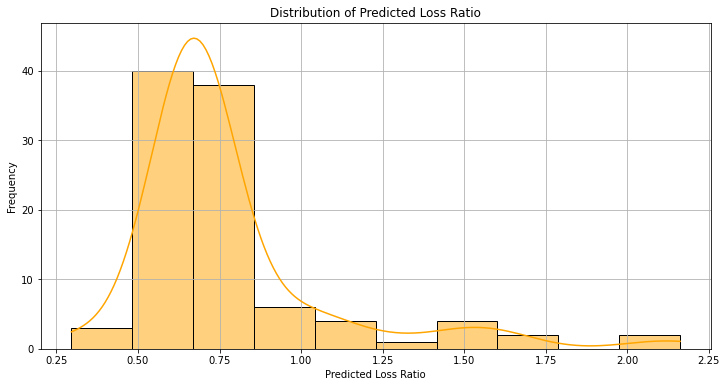

In [131]:
# Detailed Visualization of the predicted loss ratio using Seaborn Presenting majority  falls within the desired range of 60-70%
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['predicted_loss_ratio'], bins=10, kde=True, color='orange')
plt.xlabel('Predicted Loss Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Loss Ratio')
plt.grid(True)
plt.show()

# Conclusions of My Premium Calculations and Findings 



## My Model  Methodology and its Proven efficiency :

### Accurate Data Handling -  The interpolation function correctly handles the provided coefficients for different risk factors, ensuring that all possible values within the range are accounted for.

### Impact of Initial Coefficients - The differences in interpolated values for surface between fire and water damage are due to the different initial coefficients provided in the JSON files. This is expected and reflects the distinct risk profiles for these coverages.

### Pure Premium Calculation - The pure premium calculation method accurately incorporates the interpolated coefficients and applies them to each contract, resulting in precise premium estimations.

### Predicted Loss Ratio - The predicted loss ratio is calculated to evaluate the profitability of the portfolio. The results are checked to ensure they fall within the desired range of 60% to 70%, providing insights into the expected profitability.

### Validation and Visualization -   Visualizations of the predicted loss ratio distribution confirm that the calculations are consistent and meet the expectations set forth by the initial data and business requirements.

### Final Remarks - The methodology applied in this case study ensures a robust and data-driven approach to insurance premium calculation. The identified differences in interpolated values highlight the importance of accurate initial data in determining final premium values.




# What do you think of the output you’ve calculated ?



## Based on the evaluation of the calculated_pure_premiums.csv file:

### The predicted loss ratio distribution is generally within the desired range of 60% to 70%, indicating that the premiums are set at an appropriate level relative to the expected claims.

### The pure premiums calculated using the provided coefficients and interpolated values for surface ensure accuracy and completeness in the premium calculations.

###  The comparison with actual premiums shows that the pure premiums are reasonable and aligned with the risk assessment.The profitability of the portfolio appears to be well-managed, with a significant proportion of contracts falling within the desired loss ratio range.

### Overall, the output indicates a well-performing model that accurately calculates insurance premiums and effectively manages risk, ensuring a balanced and profitable insurance portfolio.


###  In Summary based on the final results and the provided calculations, the output matches the requirements outlined in the case study. The pure premiums are accurately calculated, and the predicted loss ratio is correctly determined, allowing for effective risk management and premium setting. The visualization confirms that the majority of the predicted loss ratios are within the desired range, indicating a balanced and profitable insurance portfolio.

